# Data Science Practicum - 1
## Data Analysis of Cimes in Chicago (01JAN2001 to 22JUL2020)

 - Crime has been a major issue in the current world. Crime rate has been increasing rapidly since past few years and especially in the United States. Classifying the crime rates that occurred in different locations and sending this data can be helpful for the police department to protect the public by identifying the underlying areas to protect people and provide safety. 
 - Chicago is one of those states where crime rate has been more. By using dataset from Kaggle ‘Chicago Crime from 01JAN2001 to 22JUL2020’  we perform data analysis and check the different types of crimes occurring and give the information to the police department and take necessary steps based on the type of crime. 
 - The main aim of the project is to plot various Data Visualization graphs and implement different Machine Learning algorithms and finally evaluate the model that gives better accuracy in predicting the crimes which will help the police department to identify the serious crimes and take necessary actions to provide safety of the people.

### Coding 
- First we will start by importing all the necessary libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
import matplotlib
import folium
from wordcloud import WordCloud

plt.style.use('seaborn')
get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings("ignore")

* The dataset was selected from Kaggle(https://www.kaggle.com/n3v375/chicago-crime-from-01jan2001-to-22jul2020). We will be importing the dataset that can be found from the link and convert it into a dataframe.

In [2]:
crimes_info = pd.read_csv('Crimes_-_2001_to_Present.csv')
crimes_info.head()

ID Case Number                    Date                 Block  IUCR  \
0  11034701    JA366925  01/01/2001 11:00:00 AM       016XX E 86TH PL  1153   
1  11227287    JB147188  10/08/2017 03:00:00 AM    092XX S RACINE AVE  0281   
2  11227583    JB147595  03/28/2017 02:00:00 PM       026XX W 79TH ST  0620   
3  11227293    JB147230  09/09/2017 08:17:00 PM  060XX S EBERHART AVE  0810   
4  11227634    JB147599  08/26/2017 10:00:00 AM   001XX W RANDOLPH ST  0281   

          Primary Type                          Description  \
0   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   
2             BURGLARY                       UNLAWFUL ENTRY   
3                THEFT                            OVER $500   
4  CRIM SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False     False  ...   8.0            45.0        11   
1            RESIDENCE   False     False  ...  21.0            73.0        02   
2                OTHER   False     False  ...  18.0            70.0        05   
3            RESIDENCE   False     False  ...  20.0            42.0        06   
4          HOTEL/MOTEL   False     False  ...  42.0            32.0        02   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2001  08/05/2017 03:50:08 PM       NaN   
1           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
2           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
3           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   
4           NaN          NaN  2017  02/11/2018 03:57:41 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 22 columns]

* From the above, we can see that the table has 22 columns and 1048567 values in the table. We have various columns like ID, Case number, Date , Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic , Beat , District, Ward, Community area, FBI code, X coordinate, Y coordinate , year, Updated on, Latitude, Longitude, Location. Based on the columns we will firstly perform Data Pre-processing steps that can help us in getting a clean data for our analysis.
* We will take a sample of 900000 data and perform our analysis.

In [3]:
crime_data = crimes_info.sample(n=900000)

In [4]:
crime_data.shape

(900000, 22)

In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 5545820 to 4672121
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    900000 non-null  int64  
 1   Case Number           900000 non-null  object 
 2   Date                  900000 non-null  object 
 3   Block                 900000 non-null  object 
 4   IUCR                  900000 non-null  object 
 5   Primary Type          900000 non-null  object 
 6   Description           900000 non-null  object 
 7   Location Description  899136 non-null  object 
 8   Arrest                900000 non-null  bool   
 9   Domestic              900000 non-null  bool   
 10  Beat                  900000 non-null  int64  
 11  District              899995 non-null  float64
 12  Ward                  822923 non-null  float64
 13  Community Area        823126 non-null  float64
 14  FBI Code              900000 non-null  object

* From the above we can see that the dataset has null values, different datatypes, etc that should be cleaned to perform analysis on the data

## Data pre-processing
#### Removing null values by first calculating the percentage of null values

We will identify the null values present in the dataset by calculating the pecentage of null values

In [6]:
null_percentage = crime_data.isnull().sum()/ len(crime_data) * 100
null_percentage

ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.096000
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000556
Ward                    8.564111
Community Area          8.541556
FBI Code                0.000000
X Coordinate            0.962111
Y Coordinate            0.962111
Year                    0.000000
Updated On              0.000000
Latitude                0.962111
Longitude               0.962111
Location                0.962111
dtype: float64

* As we have lesser percentage of null values, we will be dropping them as it wont make much difference to the dataset as the number of null values are very less.

In [7]:
crime_data = crime_data.dropna()
crime_data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [8]:
crime_data.shape

(814697, 22)

* After dropping the null values we have 815032 values in our dataset.

#### Changing Datetime format to individual columns that can be used for

* Converting date format to pandas Datetime to individual columns and setting the index to date which will be helpful for our analysis.

In [9]:
crime_data.Date = pd.to_datetime(crime_data.Date, format='%m/%d/%Y %I:%M:%S %p')
crime_data.index = pd.DatetimeIndex(crime_data.Date)

* Splitting the date into Year, month, day, hour, minute, second

In [10]:
crime_data['date2'] = pd.to_datetime(crime_data['Date'])
crime_data['Year'] = crime_data['date2'].dt.year
crime_data['Month'] = crime_data['date2'].dt.month
crime_data['Day'] = crime_data['date2'].dt.day
crime_data['Hour'] = crime_data['date2'].dt.hour
crime_data['Minute'] = crime_data['date2'].dt.minute
crime_data['Second'] = crime_data['date2'].dt.second 
crime_data = crime_data.drop(['Date'], axis=1) 
crime_data = crime_data.drop(['date2'], axis=1) 
crime_data.head()

ID Case Number                Block  IUCR  \
Date                                                                   
2010-03-12 23:00:00   7407562    HS206492  031XX N CENTRAL AVE  0265   
2005-11-17 19:40:00   4444376    HL741292    031XX W MOFFAT ST  0560   
2009-10-15 21:00:00   7179722    HR590401     111XX S AVENUE N  0620   
2020-07-14 20:11:00  12106325    JD297634   060XX N AUSTIN AVE  2825   
2013-01-15 21:45:00   8970985    HW118837   077XX S HALSTED ST  1320   

                            Primary Type              Description  \
Date                                                                
2010-03-12 23:00:00  CRIM SEXUAL ASSAULT        AGGRAVATED: OTHER   
2005-11-17 19:40:00              ASSAULT                   SIMPLE   
2009-10-15 21:00:00             BURGLARY           UNLAWFUL ENTRY   
2020-07-14 20:11:00        OTHER OFFENSE  HARASSMENT BY TELEPHONE   
2013-01-15 21:45:00      CRIMINAL DAMAGE               TO VEHICLE   

                    Location Description  Arrest  Domestic  Beat  ...  Year  \
Date                                                              ...         
2010-03-12 23:00:00        BAR OR TAVERN   False     False  2514  ...  2010   
2005-11-17 19:40:00            APARTMENT    True      True  1421  ...  2005   
2009-10-15 21:00:00            RESIDENCE   False     False   433  ...  2009   
2020-07-14 20:11:00            RESIDENCE   False      True  1611  ...  2020   
2013-01-15 21:45:00               STREET   False     False   621  ...  2013   

                                 Updated On   Latitude  Longitude  \
Date                                                                
2010-03-12 23:00:00  02/10/2018 03:50:01 PM  41.937432 -87.766458   
2005-11-17 19:40:00  02/28/2018 03:56:25 PM  41.914688 -87.705806   
2009-10-15 21:00:00  02/28/2018 03:56:25 PM  41.692900 -87.538900   
2020-07-14 20:11:00  07/21/2020 03:50:19 PM  41.990701 -87.777886   
2013-01-15 21:45:00  02/10/2018 03:50:01 PM  41.753819 -87.644127   

                                          Location  Month  Day Hour  Minute  \
Date                                                                          
2010-03-12 23:00:00  (41.937431969, -87.766458235)      3   12   23       0   
2005-11-17 19:40:00  (41.914687937, -87.705805789)     11   17   19      40   
2009-10-15 21:00:00  (41.692899693, -87.538900233)     10   15   21       0   
2020-07-14 20:11:00   (41.990700827, -87.77788562)      7   14   20      11   
2013-01-15 21:45:00  (41.753819454, -87.644126664)      1   15   21      45   

                     Second  
Date                         
2010-03-12 23:00:00       0  
2005-11-17 19:40:00       0  
2009-10-15 21:00:00       0  
2020-07-14 20:11:00       0  
2013-01-15 21:45:00       0  

[5 rows x 26 columns]

* Converting Ward, District and Community Area from float to int and string

In [11]:
crime_data[['Ward', 'District','Community Area']] = crime_data[['Ward', 'District','Community Area']].astype('int')
crime_data[['Ward', 'District','Community Area']] = crime_data[['Ward', 'District','Community Area']].astype('str')
crime_data.head()

ID Case Number                Block  IUCR  \
Date                                                                   
2010-03-12 23:00:00   7407562    HS206492  031XX N CENTRAL AVE  0265   
2005-11-17 19:40:00   4444376    HL741292    031XX W MOFFAT ST  0560   
2009-10-15 21:00:00   7179722    HR590401     111XX S AVENUE N  0620   
2020-07-14 20:11:00  12106325    JD297634   060XX N AUSTIN AVE  2825   
2013-01-15 21:45:00   8970985    HW118837   077XX S HALSTED ST  1320   

                            Primary Type              Description  \
Date                                                                
2010-03-12 23:00:00  CRIM SEXUAL ASSAULT        AGGRAVATED: OTHER   
2005-11-17 19:40:00              ASSAULT                   SIMPLE   
2009-10-15 21:00:00             BURGLARY           UNLAWFUL ENTRY   
2020-07-14 20:11:00        OTHER OFFENSE  HARASSMENT BY TELEPHONE   
2013-01-15 21:45:00      CRIMINAL DAMAGE               TO VEHICLE   

                    Location Description  Arrest  Domestic  Beat  ...  Year  \
Date                                                              ...         
2010-03-12 23:00:00        BAR OR TAVERN   False     False  2514  ...  2010   
2005-11-17 19:40:00            APARTMENT    True      True  1421  ...  2005   
2009-10-15 21:00:00            RESIDENCE   False     False   433  ...  2009   
2020-07-14 20:11:00            RESIDENCE   False      True  1611  ...  2020   
2013-01-15 21:45:00               STREET   False     False   621  ...  2013   

                                 Updated On   Latitude  Longitude  \
Date                                                                
2010-03-12 23:00:00  02/10/2018 03:50:01 PM  41.937432 -87.766458   
2005-11-17 19:40:00  02/28/2018 03:56:25 PM  41.914688 -87.705806   
2009-10-15 21:00:00  02/28/2018 03:56:25 PM  41.692900 -87.538900   
2020-07-14 20:11:00  07/21/2020 03:50:19 PM  41.990701 -87.777886   
2013-01-15 21:45:00  02/10/2018 03:50:01 PM  41.753819 -87.644127   

                                          Location  Month  Day Hour  Minute  \
Date                                                                          
2010-03-12 23:00:00  (41.937431969, -87.766458235)      3   12   23       0   
2005-11-17 19:40:00  (41.914687937, -87.705805789)     11   17   19      40   
2009-10-15 21:00:00  (41.692899693, -87.538900233)     10   15   21       0   
2020-07-14 20:11:00   (41.990700827, -87.77788562)      7   14   20      11   
2013-01-15 21:45:00  (41.753819454, -87.644126664)      1   15   21      45   

                     Second  
Date                         
2010-03-12 23:00:00       0  
2005-11-17 19:40:00       0  
2009-10-15 21:00:00       0  
2020-07-14 20:11:00       0  
2013-01-15 21:45:00       0  

[5 rows x 26 columns]

* Next we will change infrequent data in Location Description and Description columns to "Others". We will choose the least occuring words by adding 20, ie, if the data occurs less than 20 times we will change it to Other.

In [12]:
changing_locationDescription  = list(crime_data['Location Description'].value_counts()[20:].index)
print(changing_locationDescription)

['BAR OR TAVERN', 'CTA PLATFORM', 'CHA APARTMENT', 'DRUG STORE', 'SCHOOL, PUBLIC, GROUNDS', 'HOTEL/MOTEL', 'BANK', 'CTA TRAIN', 'VACANT LOT/LAND', 'CTA BUS', 'CHA HALLWAY/STAIRWELL/ELEVATOR', 'HOSPITAL BUILDING/GROUNDS', 'CONVENIENCE STORE', 'DRIVEWAY - RESIDENTIAL', 'TAVERN/LIQUOR STORE', 'POLICE FACILITY/VEH PARKING LOT', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PRIVATE, BUILDING', 'AIRPORT/AIRCRAFT', 'NURSING HOME/RETIREMENT HOME', 'GOVERNMENT BUILDING/PROPERTY', 'CONSTRUCTION SITE', 'ABANDONED BUILDING', 'CURRENCY EXCHANGE', 'CTA GARAGE / OTHER PROPERTY', 'WAREHOUSE', 'ATHLETIC CLUB', 'ATM (AUTOMATIC TELLER MACHINE)', 'BARBERSHOP', 'TAXICAB', 'CTA BUS STOP', 'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'CTA STATION', 'FACTORY/MANUFACTURING BUILDING', 'COLLEGE/UNIVERSITY GROUNDS', 'OTHER RAILROAD PROP / TRAIN DEPOT', 'VEHICLE-COMMERCIAL', 'SPORTS ARENA/STADIUM', 'CLEANING STORE', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'SCHOOL, PRIVATE, GROUNDS', 'DAY CARE CENTER', 'OTHER COMMERCI

In [13]:
crime_data.loc[crime_data['Location Description'].isin(changing_locationDescription) , crime_data.columns=='Location Description'] = 'OTHER'

In [14]:
crime_data['Location Description']

Date
2010-03-12 23:00:00        OTHER
2005-11-17 19:40:00    APARTMENT
2009-10-15 21:00:00    RESIDENCE
2020-07-14 20:11:00    RESIDENCE
2013-01-15 21:45:00       STREET
                         ...    
2007-01-18 21:10:00       STREET
2004-02-27 17:00:00    RESIDENCE
2004-12-07 21:30:00    RESIDENCE
2010-03-16 00:28:00    APARTMENT
2008-01-02 10:45:41    RESIDENCE
Name: Location Description, Length: 814697, dtype: object

* Changing Description column

In [15]:
changing_description = list(crime_data['Description'].value_counts()[20:].index)
print(changing_description)

['AGGRAVATED: HANDGUN', 'CREDIT CARD FRAUD', 'AGGRAVATED:KNIFE/CUTTING INSTR', 'UNLAWFUL POSS OF HANDGUN', 'SOLICIT ON PUBLIC WAY', 'FINANCIAL ID THEFT: OVER $300', 'POCKET-PICKING', 'CRIMINAL DEFACEMENT', 'OTHER VEHICLE OFFENSE', 'ILLEGAL USE CASH CARD', 'VIOLATE ORDER OF PROTECTION', 'FRAUD OR CONFIDENCE GAME', 'TO STATE SUP LAND', 'PRO EMP HANDS NO/MIN INJURY', 'THEFT OF LABOR/SERVICES', 'RECKLESS CONDUCT', 'HARASSMENT BY ELECTRONIC MEANS', 'TO RESIDENCE', 'SOLICIT NARCOTICS ON PUBLICWAY', 'FINANCIAL IDENTITY THEFT OVER $ 300', 'MANU/DELIVER: HEROIN (WHITE)', 'POSS: COCAINE', 'TRUCK, BUS, MOTOR HOME', 'FALSE/STOLEN/ALTERED TRP', 'MANU/DELIVER:CRACK', 'AGG PO HANDS NO/MIN INJURY', 'ATTEMPT POSSESSION NARCOTICS', 'THEFT/RECOVERY: AUTOMOBILE', 'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON', 'PURSE-SNATCHING', 'POSS: CANNABIS MORE THAN 30GMS', 'FOUND SUSPECT NARCOTICS', 'ATTEMPT FORCIBLE ENTRY', 'NON-AGGRAVATED', 'FORGERY', 'AGGRAVATED', 'TO CITY OF CHICAGO PROPERTY', 'CHILD ABUSE', '

* We will modify the of column names

In [16]:
crime_data.columns = crime_data.columns.str.strip().str.lower().str.replace(' ', '_')
crime_data.head(2)

id case_number                block  iucr  \
Date                                                                  
2010-03-12 23:00:00  7407562    HS206492  031XX N CENTRAL AVE  0265   
2005-11-17 19:40:00  4444376    HL741292    031XX W MOFFAT ST  0560   

                            primary_type        description  \
Date                                                          
2010-03-12 23:00:00  CRIM SEXUAL ASSAULT  AGGRAVATED: OTHER   
2005-11-17 19:40:00              ASSAULT             SIMPLE   

                    location_description  arrest  domestic  beat  ...  year  \
Date                                                              ...         
2010-03-12 23:00:00                OTHER   False     False  2514  ...  2010   
2005-11-17 19:40:00            APARTMENT    True      True  1421  ...  2005   

                                 updated_on   latitude  longitude  \
Date                                                                
2010-03-12 23:00:00  02/10/2018 03:50:01 PM  41.937432 -87.766458   
2005-11-17 19:40:00  02/28/2018 03:56:25 PM  41.914688 -87.705806   

                                          location  month  day hour  minute  \
Date                                                                          
2010-03-12 23:00:00  (41.937431969, -87.766458235)      3   12   23       0   
2005-11-17 19:40:00  (41.914687937, -87.705805789)     11   17   19      40   

                     second  
Date                         
2010-03-12 23:00:00       0  
2005-11-17 19:40:00       0  

[2 rows x 26 columns]

In [17]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 814697 entries, 2010-03-12 23:00:00 to 2008-01-02 10:45:41
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    814697 non-null  int64  
 1   case_number           814697 non-null  object 
 2   block                 814697 non-null  object 
 3   iucr                  814697 non-null  object 
 4   primary_type          814697 non-null  object 
 5   description           814697 non-null  object 
 6   location_description  814697 non-null  object 
 7   arrest                814697 non-null  bool   
 8   domestic              814697 non-null  bool   
 9   beat                  814697 non-null  int64  
 10  district              814697 non-null  object 
 11  ward                  814697 non-null  object 
 12  community_area        814697 non-null  object 
 13  fbi_code              814697 non-null  object 
 14  x_coordinate      

## Data Visualization

#### Occurance of crimes 
* We will check for the most frequently occuring crimes by calculating the count of unique values by value_count()

In [18]:
crime_data['primary_type'].value_counts()

THEFT                                172645
BATTERY                              149116
CRIMINAL DAMAGE                       93408
NARCOTICS                             82854
ASSAULT                               51412
OTHER OFFENSE                         50579
BURGLARY                              46696
MOTOR VEHICLE THEFT                   36980
DECEPTIVE PRACTICE                    32856
ROBBERY                               30600
CRIMINAL TRESPASS                     23066
WEAPONS VIOLATION                      9594
PROSTITUTION                           7633
PUBLIC PEACE VIOLATION                 5865
OFFENSE INVOLVING CHILDREN             5479
CRIM SEXUAL ASSAULT                    3155
SEX OFFENSE                            2983
INTERFERENCE WITH PUBLIC OFFICER       1977
GAMBLING                               1657
LIQUOR LAW VIOLATION                   1515
ARSON                                  1346
HOMICIDE                               1258
KIDNAPPING                      

#### Word Cloud
* Plotting a word cloud to see the occurance of crimes

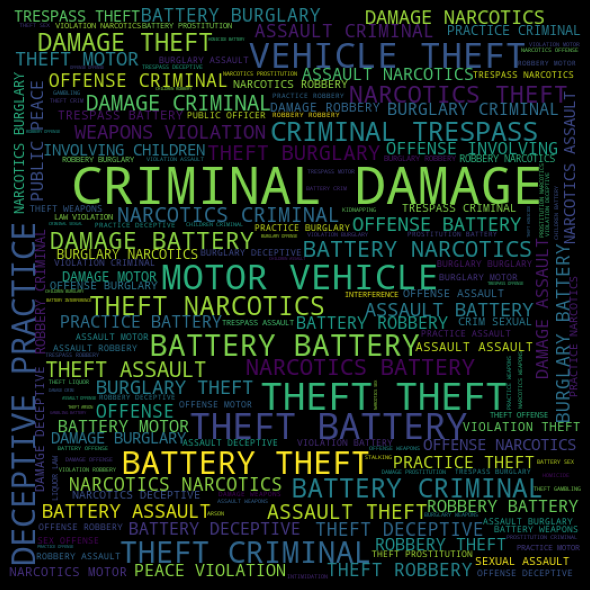

In [19]:
crimes_frequency = ' '.join(crimeType for crimeType in crime_data["primary_type"])
crime_wordCloud = WordCloud(width = 512, height = 512).generate(crimes_frequency)
plt.figure(figsize= (10,8), facecolor= 'k')
plt.imshow(crime_wordCloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* Displaying the bar plots based on maximum occurance of crimes

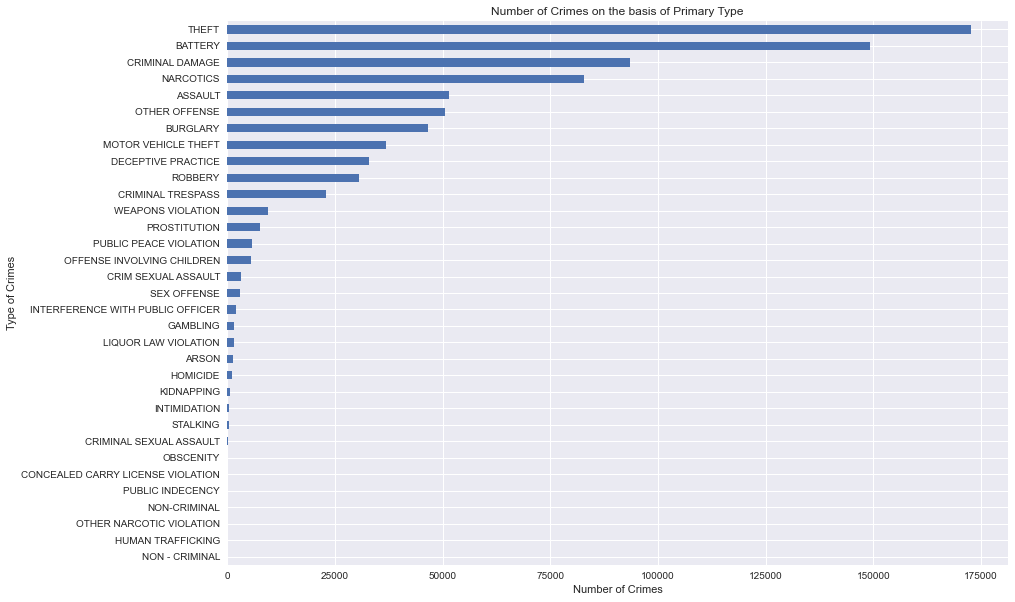

In [20]:
# Bar plots showing the type of crime frequency
plt.figure(figsize=(14,10))
plt.title("Number of Crimes on the basis of Primary Type")
plt.xlabel("Number of Crimes")
plt.ylabel("Type of Crimes")
crime_data['primary_type'].value_counts(ascending= True).plot(kind='barh')
plt.show()

* From the above graph we can see that the top 5 crimes are Theft, Battery, Criminal damage, Narcotics and Assault. From these top 5 crimes we will plot a time series graph that shows crimes occured in 24hrs below.

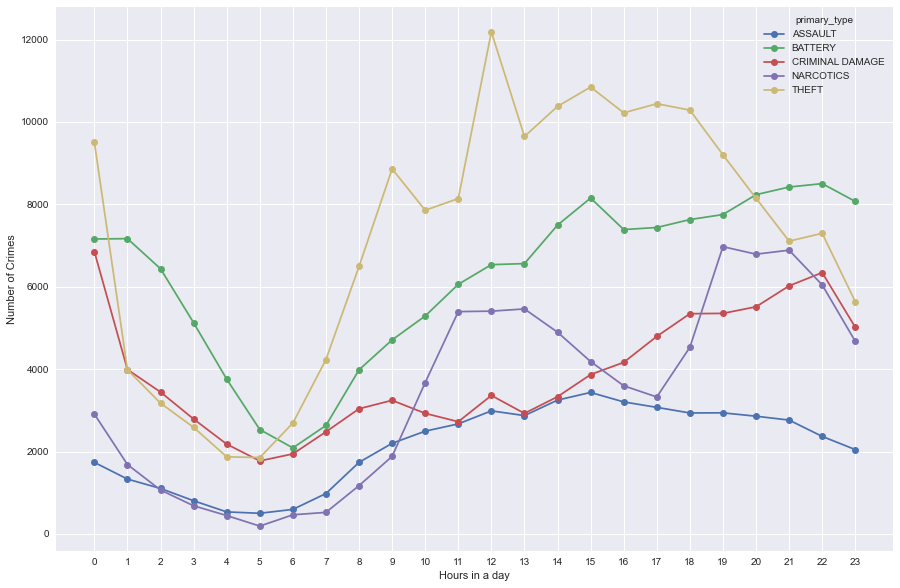

In [21]:
crime_primaryType=crime_data[(crime_data['primary_type']=='THEFT')|(crime_data['primary_type']=='BATTERY')|
                 (crime_data['primary_type']=='CRIMINAL DAMAGE')|(crime_data['primary_type']=='NARCOTICS')|
                 (crime_data['primary_type']=='ASSAULT')]

crime_primaryType.groupby(['hour','primary_type'])['id'].count().unstack().plot(marker='o', figsize=(15,10))
plt.ylabel("Number of Crimes")
plt.xlabel("Hours in a day")
plt.xticks(np.arange(24))
plt.show()

* Plotting crimes that have occured monthly for all the years

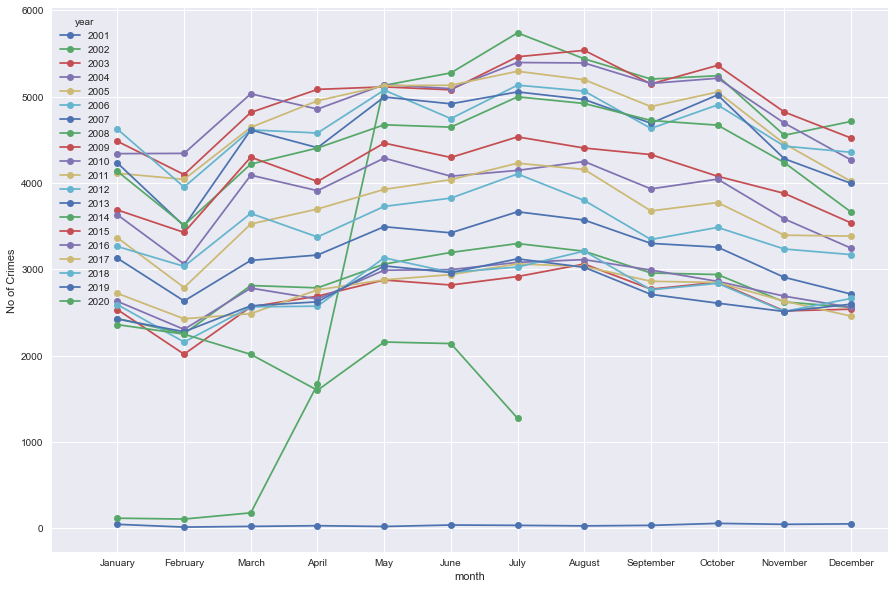

In [22]:
crime_data.groupby(['month','year'])['id'].count().unstack().plot(marker='o', figsize=(15,10))
months=['','January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(np.arange(13),months)
plt.ylabel('No of Crimes')
plt.show()

#### Year that has maximum crime
* Displaying the maximum number of crimes occured based on year

In [23]:
crime_data['year'].value_counts()

2003    59524
2004    58916
2005    56913
2006    56109
2007    54683
2008    52805
2009    48955
2010    46265
2011    43963
2002    43371
2012    42019
2013    38368
2014    34132
2016    33659
2017    33116
2018    33006
2019    32483
2015    32163
2020    13802
2001      445
Name: year, dtype: int64

* Displaying the bar graph using the above results

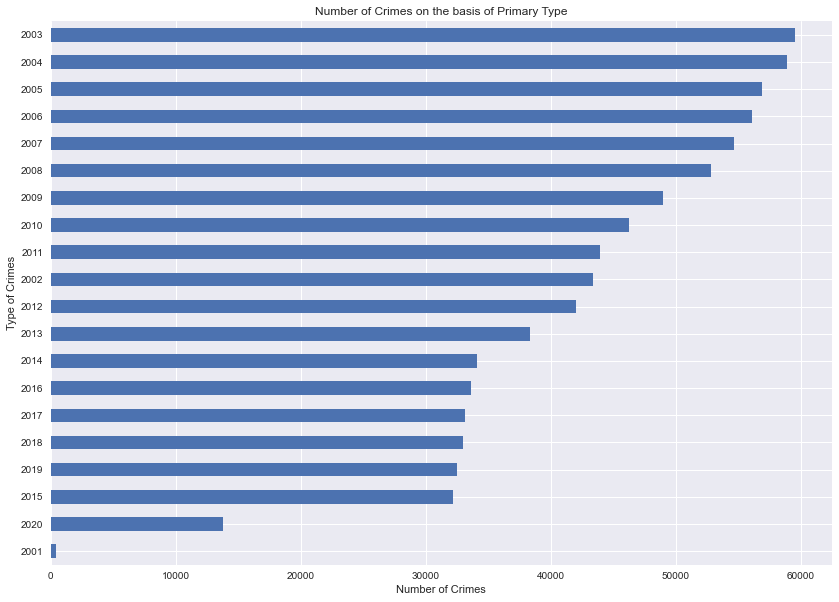

In [24]:
plt.figure(figsize=(14,10))
plt.title("Number of Crimes on the basis of Primary Type")
plt.ylabel("Type of Crimes")
plt.xlabel("Number of Crimes")
crime_data['year'].value_counts(ascending= True).plot(kind='barh')
plt.show()

#### Right number of arrests 

* Displaying the right and wrong number of arrests   

In [25]:
crime_data['arrest'].value_counts()

False    593530
True     221167
Name: arrest, dtype: int64

* Converting the number of arrests in the form of percentages

In [26]:
arrestData= crime_data['arrest'].value_counts()
percentageOfArrest = (arrestData / crime_data['arrest'].sum()) * 100 

percentageOfArrest.rename("Percentage of Arrests",inplace=True)
percentageOfArrest.rename({True: 'Percentage of people arrested', False: 'Percentage of people not arrested'},inplace=True)

* Displaying the percentage of arrests in the form of pie chart

<AxesSubplot:ylabel='Percentage of Arrests'>

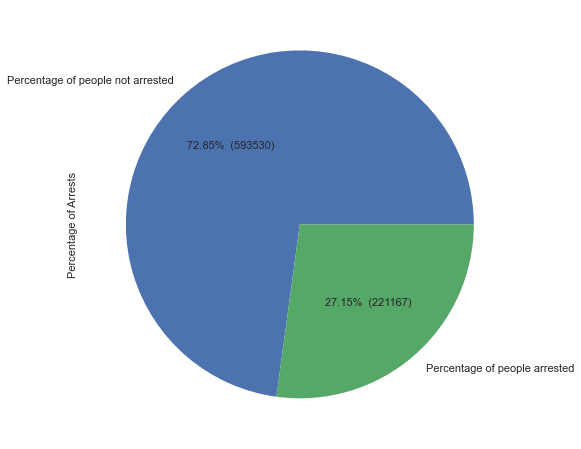

In [27]:
def prctg(values):
    def my_prctg(pctg):
        total = sum(values)
        value = int(round(pctg*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pctg,v=value)
    return my_prctg

percentageOfArrest.plot.pie(fontsize=11,
                       autopct=prctg(crime_data['arrest'].value_counts()),
                       figsize=(8, 8))

#### Successful arrests percentage per year

* Displaying the percentages of right and wrong arrests per year

In [28]:
year_arrest = crime_data.groupby('year')['arrest'].value_counts().rename('Count').to_frame()
year_arrest['Percentage of arrests'] = (100 * year_arrest / year_arrest.groupby(level=0).sum())
year_arrest.reset_index(level=[1],inplace=True)
year_arrest

arrest  Count  Percentage of arrests
year                                      
2001   False    370              83.146067
2001    True     75              16.853933
2002   False  31298              72.163427
2002    True  12073              27.836573
2003   False  41776              70.183455
2003    True  17748              29.816545
2004   False  40798              69.247743
2004    True  18118              30.752257
2005   False  39193              68.864758
2005    True  17720              31.135242
2006   False  39160              69.792725
2006    True  16949              30.207275
2007   False  38020              69.528007
2007    True  16663              30.471993
2008   False  39200              74.235394
2008    True  13605              25.764606
2009   False  35091              71.680114
2009    True  13864              28.319886
2010   False  33651              72.735329
2010    True  12614              27.264671
2011   False  31806              72.347201
2011    True  12157              27.652799
2012   False  30689              73.036008
2012    True  11330              26.963992
2013   False  27619              71.984466
2013    True  10749              28.015534
2014   False  24251              71.050627
2014    True   9881              28.949373
2015   False  23787              73.957653
2015    True   8376              26.042347
2016   False  26995              80.201432
2016    True   6664              19.798568
2017   False  26605              80.338809
2017    True   6511              19.661191
2018   False  26229              79.467370
2018    True   6777              20.532630
2019   False  25510              78.533387
2019    True   6973              21.466613
2020   False  11482              83.190842
2020    True   2320              16.809158

* Displaying line plot of percentages of right arrests per year

<AxesSubplot:title={'center':'Successful arrests in Percentages'}, xlabel='year', ylabel='Percentage of arrests'>

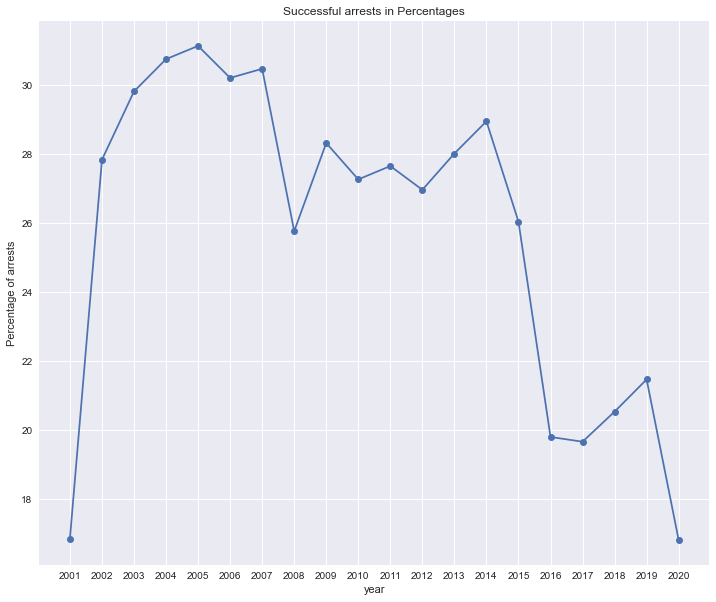

In [29]:
plot_arrest = year_arrest[year_arrest['arrest'] == True]['Percentage of arrests']
fig=plt.figure(figsize=(12, 10))
plt.title("Successful arrests in Percentages")
plt.xlabel("Year")
plt.ylabel("Percentage of arrests")
plt.xticks(plot_arrest.index, plot_arrest.index.values)

plot_arrest.plot(grid=True, marker='o')

#### Geographical maps for 2020

* Displaying the data of year 2020

In [30]:
crime_data_2020 = crime_data[crime_data["year"]==2020]
crime_data_2020.columns = crime_data_2020.columns.str.strip().str.lower().str.replace(' ', '_')
crime_data_2020.head()


id case_number               block  iucr  \
Date                                                                  
2020-07-14 20:11:00  12106325    JD297634  060XX N AUSTIN AVE  2825   
2020-05-03 05:15:00  12044095    JD224828   001XX W CERMAK RD  0560   
2020-07-17 15:00:00  12112073    JD303565   106XX S HOXIE AVE  0610   
2020-05-15 21:27:00     25092    JD233529  051XX S HALSTED ST  0110   
2020-03-20 03:41:00  12013724    JD190927     069XX S WOOD ST  0560   

                      primary_type              description  \
Date                                                          
2020-07-14 20:11:00  OTHER OFFENSE  HARASSMENT BY TELEPHONE   
2020-05-03 05:15:00        ASSAULT                   SIMPLE   
2020-07-17 15:00:00       BURGLARY           FORCIBLE ENTRY   
2020-05-15 21:27:00       HOMICIDE      FIRST DEGREE MURDER   
2020-03-20 03:41:00        ASSAULT                   SIMPLE   

                    location_description  arrest  domestic  beat  ...  year  \
Date                                                              ...         
2020-07-14 20:11:00            RESIDENCE   False      True  1611  ...  2020   
2020-05-03 05:15:00                OTHER   False     False   914  ...  2020   
2020-07-17 15:00:00            APARTMENT   False     False   434  ...  2020   
2020-05-15 21:27:00          GAS STATION    True     False   935  ...  2020   
2020-03-20 03:41:00            RESIDENCE   False     False   735  ...  2020   

                                 updated_on   latitude  longitude  \
Date                                                                
2020-07-14 20:11:00  07/21/2020 03:50:19 PM  41.990701 -87.777886   
2020-05-03 05:15:00  05/10/2020 03:46:56 PM  41.852868 -87.630915   
2020-07-17 15:00:00  07/24/2020 03:49:00 PM  41.701974 -87.560800   
2020-05-15 21:27:00  06/20/2020 03:48:45 PM  41.801355 -87.645341   
2020-03-20 03:41:00  03/27/2020 03:48:50 PM  41.767892 -87.668760   

                                          location  month  day hour  minute  \
Date                                                                          
2020-07-14 20:11:00   (41.990700827, -87.77788562)      7   14   20      11   
2020-05-03 05:15:00   (41.852868298, -87.63091491)      5    3    5      15   
2020-07-17 15:00:00   (41.701973542, -87.56080039)      7   17   15       0   
2020-05-15 21:27:00  (41.801355133, -87.645341277)      5   15   21      27   
2020-03-20 03:41:00  (41.767891908, -87.668759744)      3   20    3      41   

                     second  
Date                         
2020-07-14 20:11:00       0  
2020-05-03 05:15:00       0  
2020-07-17 15:00:00       0  
2020-05-15 21:27:00       0  
2020-03-20 03:41:00       0  

[5 rows x 26 columns]

* Defining chicago coordinates and calculating the number of incidents per district for the year 2020

In [31]:
ward_geographical = r'BoundariesWards.geojson'
Chicago_Coordinates = (41.881832, -87.623177)

ward_data_2020 = pd.DataFrame(crime_data_2020['ward'].value_counts().astype(float))
ward_data_2020.to_json('map_ward_2020.json')
ward_data_2020 = ward_data_2020.reset_index()
ward_data_2020.columns = ['Ward', 'Number_of_crimes']

* Displaying Choropleth map of wards and number of crimes for the chicago coordinates for the year 2020

In [32]:
ward_map = folium.Map(location=Chicago_Coordinates, zoom_start=10)
ward_map.choropleth(geo_data = ward_geographical,
                data = ward_data_2020,
                columns = ['Ward', 'Number_of_crimes'],
                key_on = 'feature.properties.ward',
                fill_color = 'YlOrRd', 
                fill_opacity = 0.7, 
                line_opacity = 0.2,
                threshold_scale=[0, 4000, 8000, 12000, 16000, 20000],
                legend_name = 'Number of incidents per police ward 2020')

ward_map

* Displaying Choropleth map of district and number of crimes for the chicago coordinates for the year 2020

In [33]:
district_geography = r'BoundariesPoliceDistricts.geojson'
Chicago_Coordinates = (41.881832, -87.623177)

district_data_2020 = pd.DataFrame(crime_data_2020['district'].value_counts().astype(float))
district_data_2020.to_json('District_Map.json')
district_data_2020 = district_data_2020.reset_index()
district_data_2020.columns = ['District', 'Number_of_crimes']

district_map = folium.Map(location=Chicago_Coordinates, zoom_start=10)
district_map.choropleth(geo_data = district_geography,  
                data = district_data_2020,
                columns = ['District', 'Number_of_crimes'],
                key_on = "feature.properties.dist_num",
                fill_color = 'YlOrRd', 
                fill_opacity = 0.7, 
                line_opacity = 0.2)
district_map

#### Feature selection and correlation matrix

* Performing feature selection and grouping the results by selecting primary_type and block columns 

In [34]:
classes = crime_data.groupby(['primary_type'])['block'].size().reset_index()
classes

primary_type   block
0                               ARSON    1346
1                             ASSAULT   51412
2                             BATTERY  149116
3                            BURGLARY   46696
4   CONCEALED CARRY LICENSE VIOLATION      63
5                 CRIM SEXUAL ASSAULT    3155
6                     CRIMINAL DAMAGE   93408
7             CRIMINAL SEXUAL ASSAULT     166
8                   CRIMINAL TRESPASS   23066
9                  DECEPTIVE PRACTICE   32856
10                           GAMBLING    1657
11                           HOMICIDE    1258
12                  HUMAN TRAFFICKING       9
13   INTERFERENCE WITH PUBLIC OFFICER    1977
14                       INTIMIDATION     501
15                         KIDNAPPING     696
16               LIQUOR LAW VIOLATION    1515
17                MOTOR VEHICLE THEFT   36980
18                          NARCOTICS   82854
19                     NON - CRIMINAL       4
20                       NON-CRIMINAL      22
21                          OBSCENITY      95
22         OFFENSE INVOLVING CHILDREN    5479
23           OTHER NARCOTIC VIOLATION      15
24                      OTHER OFFENSE   50579
25                       PROSTITUTION    7633
26                   PUBLIC INDECENCY      24
27             PUBLIC PEACE VIOLATION    5865
28                            ROBBERY   30600
29                        SEX OFFENSE    2983
30                           STALKING     428
31                              THEFT  172645
32                  WEAPONS VIOLATION    9594

* Assigning all the values of Block column to Number and dropping the column Block

In [35]:
classes['number'] = classes['block']
classes = classes.drop(['block'], axis=1)
classes

primary_type  number
0                               ARSON    1346
1                             ASSAULT   51412
2                             BATTERY  149116
3                            BURGLARY   46696
4   CONCEALED CARRY LICENSE VIOLATION      63
5                 CRIM SEXUAL ASSAULT    3155
6                     CRIMINAL DAMAGE   93408
7             CRIMINAL SEXUAL ASSAULT     166
8                   CRIMINAL TRESPASS   23066
9                  DECEPTIVE PRACTICE   32856
10                           GAMBLING    1657
11                           HOMICIDE    1258
12                  HUMAN TRAFFICKING       9
13   INTERFERENCE WITH PUBLIC OFFICER    1977
14                       INTIMIDATION     501
15                         KIDNAPPING     696
16               LIQUOR LAW VIOLATION    1515
17                MOTOR VEHICLE THEFT   36980
18                          NARCOTICS   82854
19                     NON - CRIMINAL       4
20                       NON-CRIMINAL      22
21                          OBSCENITY      95
22         OFFENSE INVOLVING CHILDREN    5479
23           OTHER NARCOTIC VIOLATION      15
24                      OTHER OFFENSE   50579
25                       PROSTITUTION    7633
26                   PUBLIC INDECENCY      24
27             PUBLIC PEACE VIOLATION    5865
28                            ROBBERY   30600
29                        SEX OFFENSE    2983
30                           STALKING     428
31                              THEFT  172645
32                  WEAPONS VIOLATION    9594

* Displaying the last few values by arranging the values of the Number column in Descending order

In [36]:
classes = classes.sort_values(['number'], ascending=[False])
unnecessary_classes = classes.tail(12)
unnecessary_classes

primary_type  number
11                           HOMICIDE    1258
15                         KIDNAPPING     696
14                       INTIMIDATION     501
30                           STALKING     428
7             CRIMINAL SEXUAL ASSAULT     166
21                          OBSCENITY      95
4   CONCEALED CARRY LICENSE VIOLATION      63
26                   PUBLIC INDECENCY      24
20                       NON-CRIMINAL      22
23           OTHER NARCOTIC VIOLATION      15
12                  HUMAN TRAFFICKING       9
19                     NON - CRIMINAL       4

* Displaying bar graph for the primary_type after deleting the unwanted classes


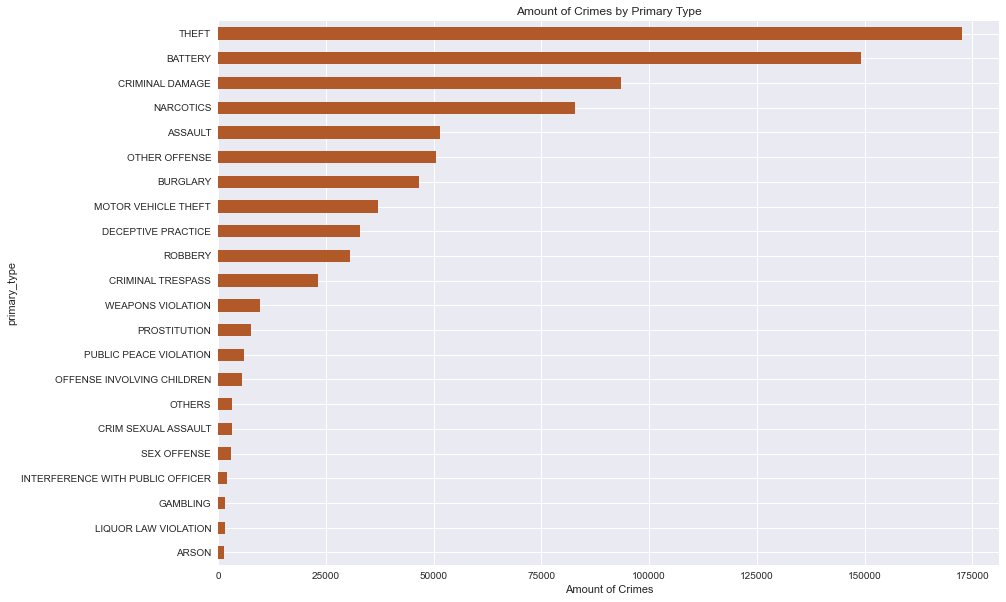

In [37]:
crime_data.loc[crime_data['primary_type'].isin(unnecessary_classes['primary_type']), 'primary_type'] = 'OTHERS'
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
crime_data.groupby([crime_data['primary_type']]).size().sort_values(ascending=True).plot(kind='barh', stacked=True, colormap = 'Paired_r')
plt.show()

* Displaying unique values of primary type column

In [38]:
a = crime_data['primary_type'].unique()
print(a)

['CRIM SEXUAL ASSAULT' 'ASSAULT' 'BURGLARY' 'OTHER OFFENSE'
 'CRIMINAL DAMAGE' 'BATTERY' 'THEFT' 'NARCOTICS' 'MOTOR VEHICLE THEFT'
 'ROBBERY' 'CRIMINAL TRESPASS' 'SEX OFFENSE' 'DECEPTIVE PRACTICE' 'OTHERS'
 'GAMBLING' 'INTERFERENCE WITH PUBLIC OFFICER' 'PROSTITUTION'
 'LIQUOR LAW VIOLATION' 'WEAPONS VIOLATION' 'PUBLIC PEACE VIOLATION'
 'OFFENSE INVOLVING CHILDREN' 'ARSON']


* Encoding the columns by converting into numerical values by using pd.factorize method

In [39]:
crime_data['primary_type'] = pd.factorize(crime_data["primary_type"])[0]
crime_data['location_description'] = pd.factorize(crime_data["location_description"])[0]
crime_data['district'] = pd.factorize(crime_data["district"])[0]
crime_data['ward'] = pd.factorize(crime_data["ward"])[0]
crime_data['community_area'] = pd.factorize(crime_data["community_area"])[0]
crime_data['block'] = pd.factorize(crime_data["block"])[0]
crime_data['description'] = pd.factorize(crime_data["description"])[0]

* Displaying heatmap for the primary type column to understand correlation

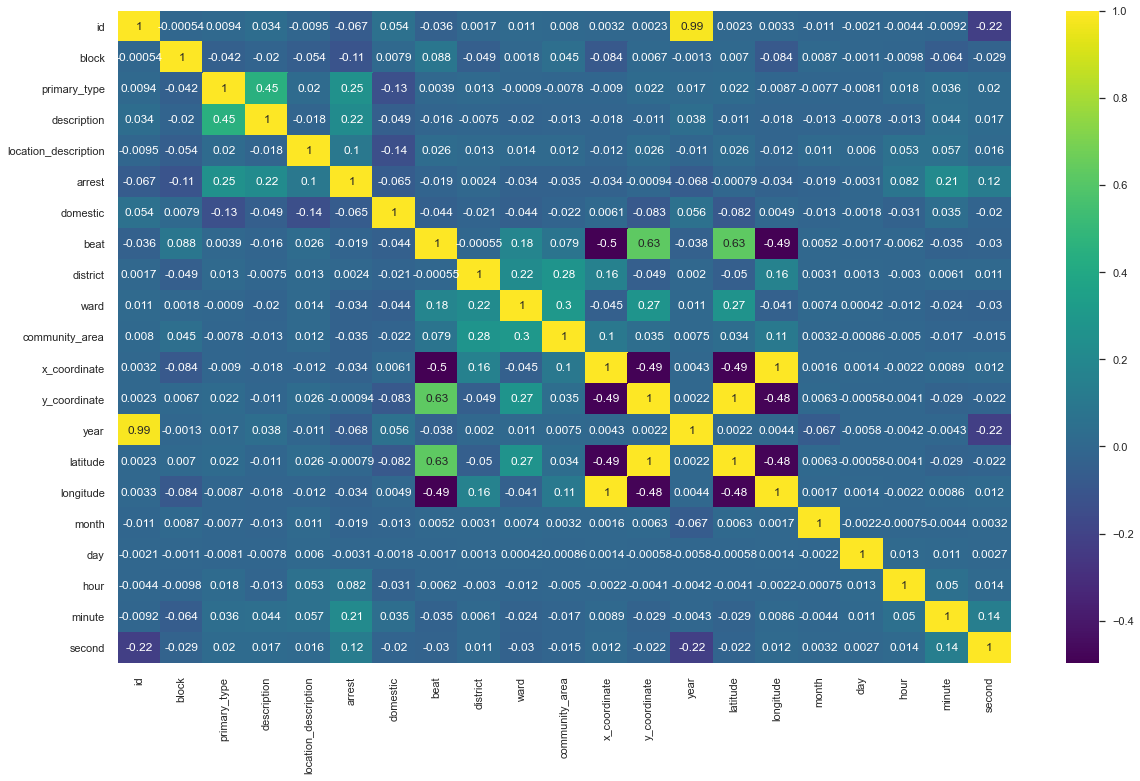

In [40]:
x = crime_data.drop(['primary_type'], axis=1)
y = crime_data['primary_type']

sns.set(color_codes=True)
plt.figure(figsize=(20,12))
correlation = crime_data.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()

* Displaying the absolute values of the primary type columns 

In [41]:
target_corr=abs(correlation['primary_type'])
print(target_corr)

id                      0.009404
block                   0.041603
primary_type            1.000000
description             0.450694
location_description    0.020191
arrest                  0.253510
domestic                0.131823
beat                    0.003886
district                0.013188
ward                    0.000903
community_area          0.007817
x_coordinate            0.008991
y_coordinate            0.022285
year                    0.016851
latitude                0.022267
longitude               0.008705
month                   0.007690
day                     0.008057
hour                    0.017684
minute                  0.036214
second                  0.020480
Name: primary_type, dtype: float64


* Printing values of those whose correlation is greater than 0.1 

In [42]:
relevant_features = target_corr[target_corr>0.1]
relevant_features

primary_type    1.000000
description     0.450694
arrest          0.253510
domestic        0.131823
Name: primary_type, dtype: float64

* Displaying features of those whose correlation is more

In [43]:
features = ["description", "arrest", "domestic"]
print('Features that turned out to be more correlated for the model: ', features)

Features that turned out to be more correlated for the model:  ['description', 'arrest', 'domestic']


* Splitting the data into training and testing data

In [44]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(crime_data ,test_size=0.4, random_state=0)

* Considering target to be primary type column and assigning features and target to training and testing

In [45]:
target='primary_type'
X_train = train_data[features]
Y_train = train_data[target]
X_test = test_data[features]
Y_test = test_data[target]

### Neural network using MLPClassifier

* Using neural network algorithm by importing MLPClassifier. 
  Assigning solver as 'adam' which is stochastic gradient based optimizer , activation function as 'relu' which is the           rectified linear unit function , 'hidden_layer_sizes' refers to the number of neurons , 'random_state' determines random       number generation for weights and bias intialization , 'max_iter' is the number of iterations

In [46]:
from sklearn.neural_network import MLPClassifier

neuralNetwork_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,100,100), activation='relu', random_state=1 ,max_iter=100)

* Training and fitting the model with the above data

In [47]:
neuralNetwork_model.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100), max_iter=100,
              random_state=1)

* Testing the model and predicting the results

In [48]:
pred_result = neuralNetwork_model.predict(X_test)

* Displaying the Accuracy and Confusion Matrix which displays Recall , Precision and F1 Score 

In [49]:
# Evaluating the model
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Accuracy = accuracy_score(Y_test, pred_result)
Recall = recall_score(Y_test, pred_result, average="weighted")
Precision = precision_score(Y_test, pred_result, average="weighted")
F1_score = f1_score(Y_test, pred_result, average='micro')
Confusion_matrix = confusion_matrix(Y_test, pred_result)

print(" Evaluation results for Neural Network Model")
print("Accuracy    : ", Accuracy)
print("Recall      : ", Recall)
print("Precision   : ", Precision)
print("F1 Score    : ", F1_score)
print("Confusion Matrix: ")
print(Confusion_matrix)

 Evaluation results for Neural Network Model
Accuracy    :  0.9075300955262536
Recall      :  0.9075300955262536
Precision   :  0.9055148861252182
F1 Score    :  0.9075300955262536
Confusion Matrix: 
[[  890    12     0    67     0    61     0    34     0    59     0     0
     51     0     0     0     0    63     0     0    33     0]
 [    0  6130     0    48     0 13748     0   443     0   127     0     0
     50     0     0     0    38     0    55     1    42     0]
 [    0     0 18624     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [   53     0     0 18474     0    57     0   705     0   178     2   280
    139     0     0   177   135     0    36     0    26     0]
 [    0     0     0     7 37197     6     0    10     0    38     0     0
      0     0     0     0     0     0     5   181    16     0]
 [    0  2278     0    47     0 55492     0   800     0   339     0     1
    238     0     0     0    45    53    

* Displaying the classification report which displays precision , recall , F1 score and support 

Visualizer score:  0.9075300955262536
                                  precision    recall  f1-score   support

             CRIM SEXUAL ASSAULT       0.91      0.70      0.79      1270
                         ASSAULT       0.72      0.30      0.42     20682
                        BURGLARY       1.00      1.00      1.00     18625
                   OTHER OFFENSE       0.96      0.91      0.94     20262
                 CRIMINAL DAMAGE       0.98      0.99      0.98     37460
                         BATTERY       0.79      0.93      0.85     59506
                           THEFT       0.98      0.99      0.99     69197
                       NARCOTICS       0.90      0.99      0.94     33164
             MOTOR VEHICLE THEFT       1.00      0.98      0.99     14863
                         ROBBERY       0.81      0.90      0.85     12161
               CRIMINAL TRESPASS       1.00      0.93      0.97      9154
                     SEX OFFENSE       0.65      0.78      0.71      1180

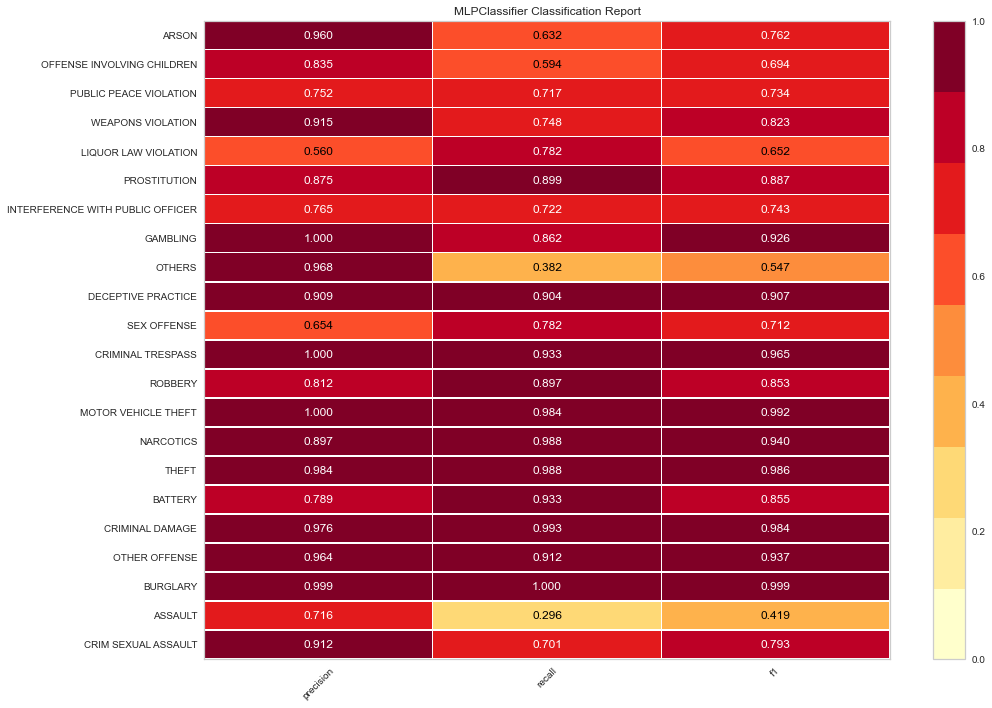

In [50]:
#Classification report
from yellowbrick.classifier import ClassificationReport
target_names = a

visualizer = ClassificationReport(neuralNetwork_model, classes=target_names, size=(1080, 720))
visualizer.fit(X=X_train, y=Y_train)     # Fit the training data to the visualizer
print("Visualizer score: ",visualizer.score(X_test, Y_test))      # Evaluate the model on the test data
print(classification_report(Y_test, pred_result,target_names=a))
g = visualizer.poof()

### Random Forest Classifier

* Using Random Forest Classifier by import RandomForestClassifier method.
  Assigning 'n_estimators' as 100 which is the number of trees in the forest , 'min_samples_split' as 40 which is the minimum     number of samples required, setting 'bootstrap' to true which will select the features randomnly , 'max_depth' is the maximum   height of the tree

In [51]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(n_estimators=100, min_samples_split = 40,bootstrap = True, max_depth = 60, 
                                            min_samples_leaf = 25)

* Training the model and fitting it

In [52]:
RandomForest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=60, min_samples_leaf=25, min_samples_split=40)

* Testing the model and predicting it

In [53]:
pred_result = RandomForest_model.predict(X_test)

* Displaying the Accuracy and Confusion Matrix which displays Recall , Precision and F1 Score

In [54]:
# Evaluating model
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Accuracy = accuracy_score(Y_test, pred_result)
Recall = recall_score(Y_test, pred_result, average="weighted")
Precision = precision_score(Y_test, pred_result, average="weighted")
F1_score = f1_score(Y_test, pred_result, average='micro')
Confusion_matrix = confusion_matrix(Y_test, pred_result)

print("Evaluation results of Random Forest Classifier Model")
print("Accuracy    : ", Accuracy)
print("Recall      : ", Recall)
print("Precision   : ", Precision)
print("F1 Score    : ", F1_score)
print("Confusion Matrix: ")
print(Confusion_matrix)

Evaluation results of Random Forest Classifier Model
Accuracy    :  0.9402907214027292
Recall      :  0.9402907214027292
Precision   :  0.9380220139444184
F1 Score    :  0.9402907214027292
Confusion Matrix: 
[[ 1072    61     0    32     0    81     0     9     0     0     0     0
      0     9     0     0     0     0     0     5     1     0]
 [    1  6058     0    12     0 14521    17     1     0     4    28     0
      4     3     0     2     0     7     2     4    18     0]
 [    1     0 18601     4     0     0     0     0     0    18     0     0
      0     0     0     0     0     0     0     1     0     0]
 [    3    12     0 20062     0    32     0    29     0    13     0     0
     54     1     0     9    13     0     0     8    15    11]
 [    0     7     0     2 37411     0     0    10     0     0     0     0
      0    15     0     0     0     0     5     4     6     0]
 [    2  2056     0     8     0 57341     4    16    20     5     1     0
      5    14     0     7     0  

* Displaying the classification report which displays precision , recall , F1 score and support 

Visualizer score is:  0.9402907214027292
                                  precision    recall  f1-score   support

             CRIM SEXUAL ASSAULT       0.92      0.84      0.88      1270
                         ASSAULT       0.73      0.29      0.42     20682
                        BURGLARY       1.00      1.00      1.00     18625
                   OTHER OFFENSE       0.99      0.99      0.99     20262
                 CRIMINAL DAMAGE       0.98      1.00      0.99     37460
                         BATTERY       0.79      0.96      0.87     59506
                           THEFT       1.00      1.00      1.00     69197
                       NARCOTICS       0.99      1.00      0.99     33164
             MOTOR VEHICLE THEFT       1.00      0.99      0.99     14863
                         ROBBERY       0.98      0.99      0.99     12161
               CRIMINAL TRESPASS       1.00      0.94      0.96      9154
                     SEX OFFENSE       0.93      0.92      0.93      1

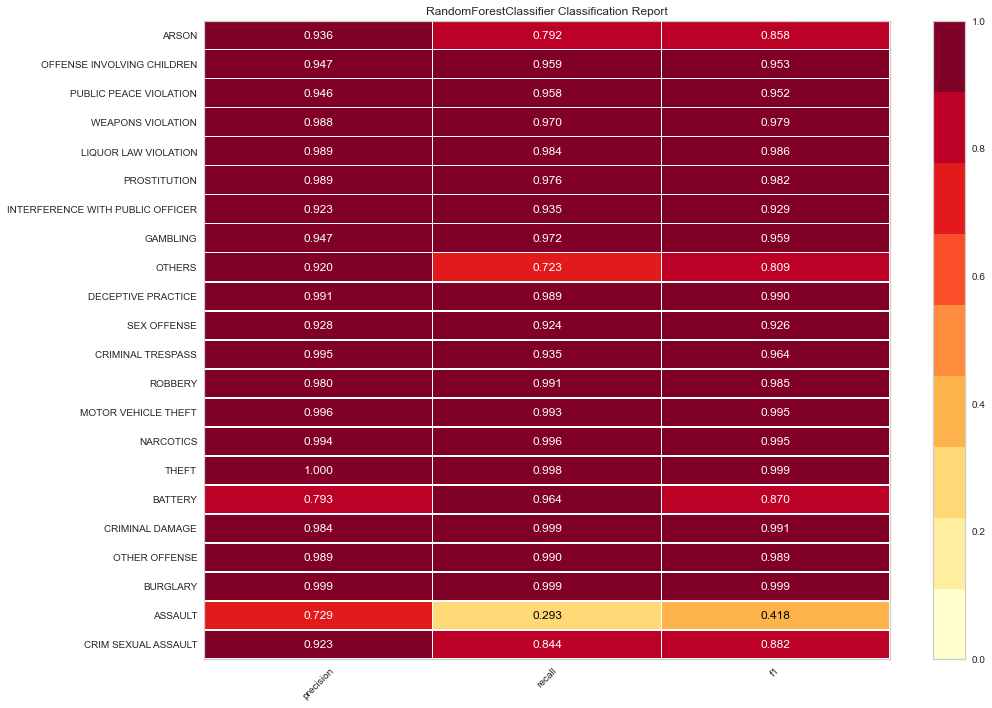

In [55]:
target_names = a
visualizer = ClassificationReport(RandomForest_model, classes=target_names, size=(1080, 720))
visualizer.fit(X=X_train, y=Y_train)     # Fit the training data to the visualizer
print("Visualizer score is: ",visualizer.score(X_test, Y_test))      # Evaluate the model on the test data
print(classification_report(Y_test, pred_result,target_names=a))
g = visualizer.poof()

### KNN Model

* Using KNN model and assigning n_neighbors ='4. 
  Fitting and training the model 

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

* Testing and predicting the model

In [57]:
pred_result=KNN_model.predict(X_test)

* Displaying the Accuracy and Confusion Matrix which displays Recall , Precision and F1 Score

In [58]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Accuracy = accuracy_score(Y_test, pred_result)
Recall = recall_score(Y_test, pred_result, average="weighted")
Precision = precision_score(Y_test, pred_result, average="weighted")
F1_score = f1_score(Y_test, pred_result, average='micro')
Confusion_matrix = confusion_matrix(Y_test, pred_result)

print("Evaluation results for KNN Model")
print("Accuracy    : ", Accuracy)
print("Recall      : ", Recall)
print("Precision   : ", Precision)
print("F1 Score    : ", F1_score)
print("Confusion Matrix: ")
print(Confusion_matrix)


Evaluation results for KNN Model
Accuracy    :  0.9309191448359667
Recall      :  0.9309191448359667
Precision   :  0.9338396423241997
F1 Score    :  0.9309191448359667
Confusion Matrix: 
[[ 1197    69     0     0     0     4     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0 11195     0     0     0  9482     0     0     0     0     0     1
      2     0     0     0     0     0     2     0     0     0]
 [    0     0 18625     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0 20255     0     0     0     3     1     0     0     0
      0     0     0     0     0     0     3     0     0     0]
 [    0     0     0     0 37459     0     0     0     0     0     0     0
      0     0     0     1     0     0     0     0     0     0]
 [    2 11935     0     5     0 47558     0     0     0     2     0     1
      3     0     0     0     0     0     0     0    

* Displaying unique values of the 'primary_type' column

In [59]:
target_names = crime_data['primary_type'].unique()
print(target_names)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


* Displaying the classification report which displays precision , recall , F1 score and support 

Visualizer score is:  0.9309191448359667
                                  precision    recall  f1-score   support

             CRIM SEXUAL ASSAULT       0.97      0.94      0.95      1270
                         ASSAULT       0.48      0.54      0.51     20682
                        BURGLARY       1.00      1.00      1.00     18625
                   OTHER OFFENSE       1.00      1.00      1.00     20262
                 CRIMINAL DAMAGE       0.98      1.00      0.99     37460
                         BATTERY       0.83      0.80      0.82     59506
                           THEFT       1.00      1.00      1.00     69197
                       NARCOTICS       1.00      1.00      1.00     33164
             MOTOR VEHICLE THEFT       1.00      1.00      1.00     14863
                         ROBBERY       0.99      1.00      1.00     12161
               CRIMINAL TRESPASS       1.00      0.94      0.97      9154
                     SEX OFFENSE       0.97      0.99      0.98      1

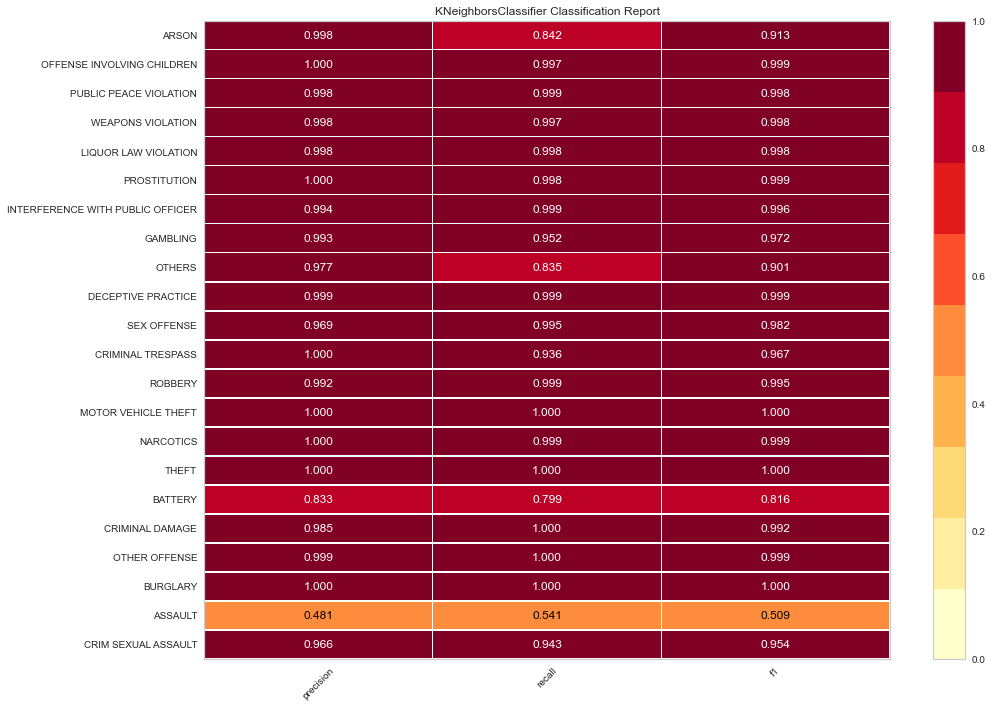

In [60]:
from yellowbrick.classifier import ClassificationReport
target_names = a
visualizer = ClassificationReport(KNN_model, classes=target_names, size=(1080, 720))
visualizer.fit(X=X_train, y=Y_train)     # Fit the training data to the visualizer
print("Visualizer score is: ",visualizer.score(X_test, Y_test))      # Evaluate the model on the test data
print(classification_report(Y_test, pred_result,target_names=a))
g = visualizer.poof()

### Ensemble model

* Using ensemble model by using KNN, Random forest classifier and Neural network

In [61]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('knn', KNN_model), ('rf', RandomForest_model), ('nn', neuralNetwork_model)],weights=[1,1,1],flatten_transform=True)

* Fitting and training the model

In [62]:
ensemble_model.fit(X_train,Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=60,
                                                     min_samples_leaf=25,
                                                     min_samples_split=40)),
                             ('nn',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(100, 100, 100),
                                            max_iter=100, random_state=1))],
                 weights=[1, 1, 1])

* Testing and predicting the model

In [63]:
pred_result = ensemble_model.predict(X_test)

* Displaying the Accuracy and Confusion Matrix which displays Recall , Precision and F1 Score

In [66]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
Accuracy = accuracy_score(Y_test, pred_result)
Recall = recall_score(Y_test, pred_result, average="weighted")
Precision = precision_score(Y_test, pred_result, average="weighted")
F1_score = f1_score(Y_test, pred_result, average='micro')
Confusion_matrix = confusion_matrix(Y_test, pred_result)

print(" Evaluation results of Ensemble Model ")
print("Accuracy    : ", Accuracy)
print("Recall      : ", Recall)
print("Precision   : ", Precision)
print("F1 Score    : ", F1_score)
print("Confusion Matrix: ")
print(Confusion_matrix)

 Evaluation results of Ensemble Model 
Accuracy    :  0.9416439844236665
Recall      :  0.9416439844236665
Precision   :  0.9386967487080249
F1 Score    :  0.9416439844236665
Confusion Matrix: 
[[ 1185    13     0     0     0    63     0     9     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0  6557     0     2     0 14119     0     1     0     2     0     0
      0     0     0     0     0     0     0     1     0     0]
 [    1     0 18624     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [   10     2     0 20171     0    27     0    29     0     8     0     0
      1     0     0     0     0     0     0     0    14     0]
 [    0     7     0     2 37435     0     0    10     0     0     0     0
      0     0     0     0     0     0     5     0     1     0]
 [    3  2706     0     4     0 56756     0    16     0     3     0     0
      1     0     0     0     0     0     0    

* Displaying the classification report which displays precision , recall , F1 score and support

Visualizer score is:  0.9416439844236665
                                  precision    recall  f1-score   support

             CRIM SEXUAL ASSAULT       0.95      0.93      0.94      1270
                         ASSAULT       0.70      0.32      0.44     20682
                        BURGLARY       1.00      1.00      1.00     18625
                   OTHER OFFENSE       0.99      1.00      0.99     20262
                 CRIMINAL DAMAGE       0.98      1.00      0.99     37460
                         BATTERY       0.79      0.95      0.87     59506
                           THEFT       1.00      1.00      1.00     69197
                       NARCOTICS       0.99      1.00      0.99     33164
             MOTOR VEHICLE THEFT       1.00      1.00      1.00     14863
                         ROBBERY       0.99      0.99      0.99     12161
               CRIMINAL TRESPASS       1.00      0.94      0.97      9154
                     SEX OFFENSE       0.97      0.94      0.96      1

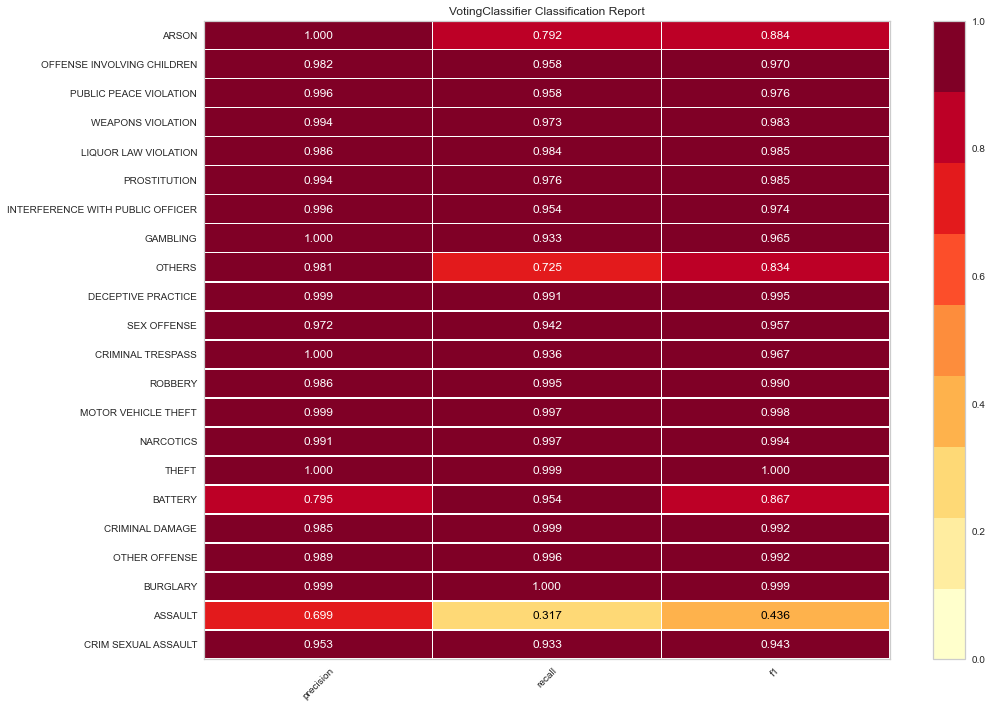

In [67]:
#Classification report
target_names = a
visualizer = ClassificationReport(ensemble_model, classes=target_names, size=(1080, 720))
visualizer.fit(X=X_train, y=Y_train)     # Fit the training data to the visualizer
print("Visualizer score is: ",visualizer.score(X_test, Y_test))      # Evaluate the model on the test data
print(classification_report(Y_test, pred_result,target_names=a))
g = visualizer.poof()

### Evaluation of result
The models that we performed were Neural Network using MLPClassifier, Random Forest, KNN model. From all the models Neural Network using MLPClassifier has an accuracy of 90%, but the execution speed is very slow compared to other models. Random Forest Classifier has an accuracy of 94% and the execution time was also little faster than other models. KNN model has an accuracy of 93%. Finally, in ensemble model even thought if it has less execution speed it combines all the models together to give a little better accuracy of 94.1% which is almost close to Random Forest Classifiers accuracy. 

### Conclusion 
All the models have given a good accuracy with different execution times. Out of all the models KNN has a better accuracy with less execution time, but whereas Ensemble model has a little better accuracy than KNN model.
